In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parameters
T = 2.0
dt = 0.005
n_steps = int(T / dt)
n_particles = 10000
times_to_save = [0.5, 1.0, 2.0]
steps_to_save = [int(t / dt) for t in times_to_save]

In [4]:
# Initialize particles from X0 ~ N(0,1)
x = np.random.normal(0, 1, n_particles)
saved_states = {t: np.zeros(n_particles) for t in times_to_save}

In [5]:
# Euler-Maruyama simulation
for step in range(1, n_steps + 1):
    dW = np.random.normal(0, np.sqrt(dt), n_particles)
    x = x - x * dt + np.sqrt(2) * dW
    t_current = step * dt
    if t_current in times_to_save:
        saved_states[t_current] = x.copy()

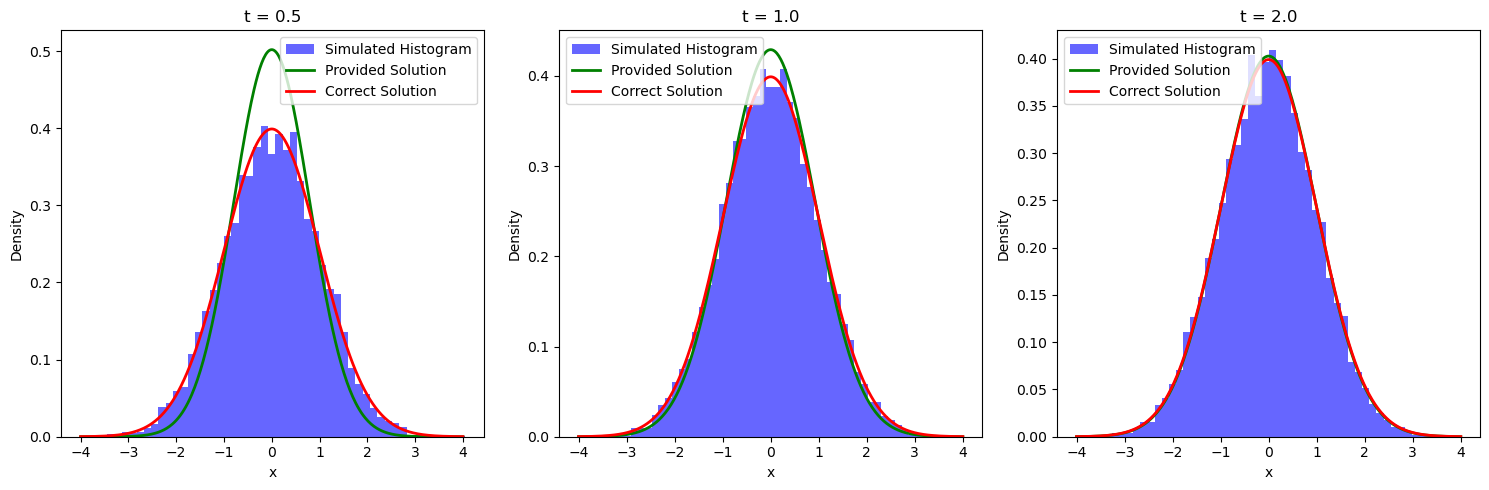

In [6]:
# Plot histograms and analytical solutions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, t in enumerate(times_to_save):
    ax = axes[i]
    data = saved_states[t]
    
    # Plot histogram
    ax.hist(data, bins=50, density=True, alpha=0.6, color='b', label='Simulated Histogram')
    
    # Provided analytical solution (for X0=0)
    var_provided = 1 - np.exp(-2 * t)
    x_vals = np.linspace(-4, 4, 400)
    p_provided = (1 / np.sqrt(2 * np.pi * var_provided)) * np.exp(-x_vals**2 / (2 * var_provided))
    ax.plot(x_vals, p_provided, 'g-', linewidth=2, label='Provided Solution')
    
    # Correct analytical solution (for X0 ~ N(0,1))
    p_correct = (1 / np.sqrt(2 * np.pi)) * np.exp(-x_vals**2 / 2)
    ax.plot(x_vals, p_correct, 'r-', linewidth=2, label='Correct Solution')
    
    ax.set_title(f't = {t}')
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.savefig('sde_comparison.png')
plt.show()